In [1]:
import ipywidgets as widgets
import ipywebrtc as webrtc

In [2]:
# a MediaStream can be a webcam, video, webrtc stream, or a canvas
# camera_stream = webrtc.CameraStream.facing_user()
media_stream = webrtc.VideoStream.from_url('ipyvolume.mp4', play=True)
media_stream

VideoStream(format='url', value=b'ipyvolume.mp4')

In [3]:
# using the image recorder
image_recorder = webrtc.MediaImageRecorder(stream=media_stream)
image_recorder

MediaImageRecorder(image=Image(value=b''), stream=VideoStream(format='url', value=b'ipyvolume.mp4'))

In [4]:
image_recorder.grab()

In [5]:
import PIL.Image
import PIL.ImageFilter

In [6]:
import io
im = PIL.Image.open(io.BytesIO(image_recorder.data))

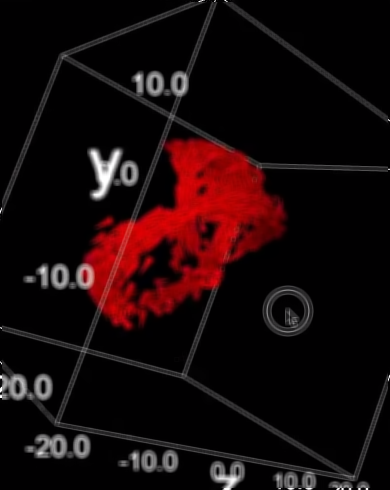

In [7]:
im.filter(PIL.ImageFilter.BLUR)

In [8]:
import numpy as np
im_array = np.array(im)
im_array

array([[[  2,   1,   2, 255],
        [  2,   1,   2, 255],
        [  2,   1,   2, 255],
        ..., 
        [  1,   0,   1, 255],
        [  2,   1,   2, 255],
        [  2,   1,   2, 255]],

       [[  2,   1,   2, 255],
        [  2,   1,   2, 255],
        [  2,   1,   2, 255],
        ..., 
        [  1,   0,   1, 255],
        [  1,   0,   1, 255],
        [  2,   1,   2, 255]],

       [[  1,   0,   1, 255],
        [  1,   0,   1, 255],
        [  1,   0,   1, 255],
        ..., 
        [  1,   0,   1, 255],
        [  1,   0,   1, 255],
        [  2,   1,   2, 255]],

       ..., 
       [[  1,   0,   1, 255],
        [  1,   0,   1, 255],
        [  1,   0,   1, 255],
        ..., 
        [  1,   0,   1, 255],
        [  1,   0,   1, 255],
        [  1,   0,   1, 255]],

       [[  1,   0,   1, 255],
        [  1,   0,   1, 255],
        [  1,   0,   1, 255],
        ..., 
        [  1,   0,   1, 255],
        [  1,   0,   1, 255],
        [  1,   0,   1, 255]],

       

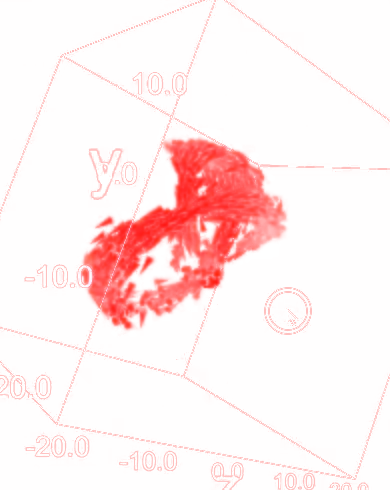

In [9]:
PIL.Image.fromarray(im_array[...,::-1])

In [11]:
from skimage.filters import roberts, sobel, scharr, prewitt
from skimage.color import rgb2gray
from skimage.color.adapt_rgb import adapt_rgb, each_channel, hsv_value
from skimage import filters


image = widgets.Image()

filter_options = [('roberts', roberts), ('sobel', sobel), ('scharr', scharr), ('prewitt', prewitt)]
filter_widget = widgets.ToggleButtons(options=filter_options)

def update_image(change):
    # turn into nparray
    im_in = PIL.Image.open(io.BytesIO(image_recorder.data))
    im_array = np.array(im_in)[...,:3] # no alpha
    
    # filter
    filter_function = filter_widget.value
    im_array_edges = adapt_rgb(each_channel)(filter_function)(im_array)
    im_array_edges = ((1-im_array_edges) * 255).astype(np.uint8)
    im_out = PIL.Image.fromarray(im_array_edges)
    
    # store in image widget
    f = io.BytesIO()
    im_out.save(f, format='png')
    image.value = f.getvalue()

image_recorder.observe(update_image, 'data')
filter_widget.observe(update_image, 'value')
widgets.jslink((image_recorder.image, 'width'), (image, 'width'))
widgets.jslink((image_recorder.image, 'height'), (image, 'height'))
widgets.VBox([filter_widget, media_stream, widgets.HBox([image_recorder, image]), ])

In [13]:
image_recorder.grab()